In [1]:
#2024美赛-解决网球势头问题
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Wimbledon_featured_matches.csv')
df2 = pd.read_csv('Overwhelming.csv')

In [3]:
df1

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,0,0,0,38.620,50.971,11,123.0,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,0,0,0,17.533,27.766,5,114.0,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,0,0,0,10.882,18.328,4,124.0,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,0,0,0,7.893,10.537,1,130.0,C,NCTL,D


In [4]:
df2

,match_id,set_no,p1_ovw_s,p2_ovw_s
0,2023-wimbledon-1301,1,0.0000,0.0000
1,2023-wimbledon-1301,2,0.0000,0.0000
2,2023-wimbledon-1301,3,0.0000,0.0000
3,2023-wimbledon-1301,4,0.0000,0.0000
4,2023-wimbledon-1302,1,0.0000,0.0000
...,...,...,...,...
112,2023-wimbledon-1701,1,0.0000,0.0000
113,2023-wimbledon-1701,2,0.0000,0.6931
114,2023-wimbledon-1701,3,0.0000,0.0000
115,2023-wimbledon-1701,4,1.3863,0.0000


In [5]:
df = pd.merge(df1, df2, on=['match_id','set_no'], how='left',suffixes=('','')) 

In [6]:
selected_rows = df.iloc[552:560]

In [7]:
selected_rows

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_ovw_s,p2_ovw_s
552,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:34:40,2,1,52,0,1,0,...,0,5.267,4.759,1,118.0,BW,NCTL,ND,0.0,0.6931
553,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:34:59,2,1,53,0,1,0,...,0,10.285,8.659,1,126.0,C,NCTL,ND,0.0,0.6931
554,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:35:44,2,2,54,0,1,0,...,0,5.019,6.263,1,123.0,BC,NCTL,D,0.0,0.6931
555,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:36:02,2,2,55,0,1,0,...,0,5.940,5.187,1,85.0,W,CTL,D,0.0,0.6931
556,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:36:29,2,2,56,0,1,0,...,0,13.291,15.717,3,92.0,C,NCTL,D,0.0,0.6931
557,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:37:00,2,2,57,0,1,0,...,0,9.283,9.139,2,126.0,W,CTL,ND,0.0,0.6931
558,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:37:21,2,2,58,0,1,0,...,0,13.867,17.960,4,111.0,W,CTL,ND,0.0,0.6931
559,2023-wimbledon-1303,Frances Tiafoe,Grigor Dimitrov,0:38:01,2,2,59,0,1,0,...,0,21.715,21.633,5,87.0,BW,NCTL,D,0.0,0.6931


In [8]:
df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_ovw_s,p2_ovw_s
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,6.000,7.840,2,95.0,BC,NCTL,ND,0.0,0.0
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,5.253,7.094,1,118.0,B,CTL,ND,0.0,0.0
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,13.800,19.808,4,120.0,B,NCTL,D,0.0,0.0
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,51.108,75.631,13,130.0,BW,CTL,D,0.0,0.0
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0.649,0.813,1,112.0,W,NCTL,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,0,38.620,50.971,11,123.0,C,NCTL,D,0.0,0.0
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,0,17.533,27.766,5,114.0,W,NCTL,ND,0.0,0.0
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,0,10.882,18.328,4,124.0,W,NCTL,D,0.0,0.0
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,0,7.893,10.537,1,130.0,C,NCTL,D,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_poi

In [10]:
#设置时间窗口，将一定时间段内的情况作为研究对象
def calculate_momentum_improved(df, index, window=3):
    start_index = max(index - window, 0)
    end_index = min(index + window + 1, len(df))
    window_df = df.iloc[start_index:end_index]
    
    # 初始化势头值
    p1_momentum = 0
    p2_momentum = 0
    
    # 赢得的局数和盘数
    p1_sets_won = window_df['p1_sets'].iloc[-1] - window_df['p1_sets'].iloc[0]
    p2_sets_won = window_df['p2_sets'].iloc[-1] - window_df['p2_sets'].iloc[0]
    p1_games_won = window_df['p1_games'].iloc[-1] - window_df['p1_games'].iloc[0]
    p2_games_won = window_df['p2_games'].iloc[-1] - window_df['p2_games'].iloc[0]

    # 发球优势
    # 认为发球方能够更好得分，设定额外权重
    serve_advantage_weight = 0.1
    p1_serve_advantage = (window_df[window_df['server'] == 1]['point_victor'] == 1).sum() * serve_advantage_weight
    p2_serve_advantage = (window_df[window_df['server'] == 2]['point_victor'] == 2).sum() * serve_advantage_weight
    
    # 胜利优势
    # 每一个game，获胜后会增强信心
    game_win_weight = 0.2
    p1_game_win = (window_df['game_victor'] == 1).sum() * game_win_weight
    p2_game_win = (window_df['game_victor'] == 2).sum() * game_win_weight
    
    # 胜利优势
    # 每一个set，获胜后会增强信心
    set_win_weight = 0.2
    p1_set_win = (window_df['set_victor'] == 1).sum() * set_win_weight
    p2_set_win = (window_df['set_victor'] == 2).sum() * set_win_weight
    
    # 上一轮胜利优势
    # 在得分上具有额外权重
    #ovws_advantage_weight = 0.5
    #p1_ovws = df['p1_ovw_s']#*ovws_advantage_weight
    #p2_ovws = df['p2_ovw_s']#*ovws_advantage_weight
    
    # 其他因素（得分优势、破发点、非受迫性失误、制胜分、直接发球得分、出现发球双误等）
    p1_points_advantage = window_df['point_victor'].apply(lambda x: x == 1).sum() - window_df['point_victor'].apply(lambda x: x == 2).sum()
    p2_points_advantage = -p1_points_advantage
    p1_break_points_won = window_df['p1_break_pt_won'].sum()
    p2_break_points_won = window_df['p2_break_pt_won'].sum()
    p1_unforced_errors = -window_df['p1_unf_err'].sum()
    p2_unforced_errors = -window_df['p2_unf_err'].sum()
    p1_winners = window_df['p1_winner'].sum()
    p2_winners = window_df['p2_winner'].sum()
    p1_ace_advantage = window_df['p1_ace'].sum()
    p2_ace_advantage = window_df['p2_ace'].sum()
    p1_double_fault = window_df['p1_double_fault'].sum()
    p2_double_fault = window_df['p2_double_fault'].sum() 
    p1_net_pt = window_df['p1_net_pt'].sum()
    p2_net_pt = window_df['p2_net_pt'].sum()   
    
    return p1_serve_advantage, p2_serve_advantage, p1_points_advantage, p2_points_advantage, p1_break_points_won,p2_break_points_won,p1_unforced_errors,p2_unforced_errors,p1_winners,p2_winners,p1_game_win,p2_game_win,p1_set_win,p2_set_win,p1_ace_advantage,p2_ace_advantage,p1_double_fault,p2_double_fault,p1_net_pt,p2_net_pt,p1_sets_won,p2_sets_won,p1_games_won,p2_games_won

In [11]:
cdf = [calculate_momentum_improved(df, index) for index in range(len(df))]

In [12]:
dfdd = pd.DataFrame(cdf)

In [13]:
dfdd

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,1,0,0,0,0,1,0,0,0,0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,1,0,0,0,0,1,0,0,0,0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,2,0,0,0,0,1,0,0,0,0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,2,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,0,0,1,1,0,0,0,1
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,0,0,2,1,0,0,0,1
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,0,0,2,1,0,0,0,0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,0,0,2,1,0,0,0,0


In [14]:
dfd = df[['p1_ovw_s','p2_ovw_s']]

In [15]:
dfd

,p1_ovw_s,p2_ovw_s
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
7279,0.0,0.0
7280,0.0,0.0
7281,0.0,0.0
7282,0.0,0.0


In [16]:
dfdd = pd.concat([dfdd,dfd], axis=1, ignore_index=True)

In [17]:
dfdd

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,0,0,0,2,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,1,1,0,0,0,1,0.0,0.0
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,1,0.0,0.0
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0


In [18]:
selected_rows = dfdd.iloc[552:560]

In [19]:
selected_rows

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
552,0.2,0.4,-3,3,0,1,0,0,0,3,...,0,0,0,1,0,1,-2,-4,0.0,0.6931
553,0.3,0.4,-1,1,0,0,0,-1,0,2,...,0,0,0,0,0,0,0,1,0.0,0.6931
554,0.3,0.3,-1,1,0,0,-1,-1,0,1,...,0,0,0,0,0,0,0,1,0.0,0.6931
555,0.3,0.2,-1,1,0,0,-1,-1,0,1,...,0,0,1,0,0,0,0,1,0.0,0.6931
556,0.4,0.1,1,-1,0,0,-1,-1,0,1,...,0,0,1,0,0,0,0,1,0.0,0.6931
557,0.4,0.1,1,-1,0,0,-2,-1,0,1,...,0,0,1,0,0,0,1,0,0.0,0.6931
558,0.3,0.2,-1,1,0,0,-3,-1,0,1,...,0,0,1,0,0,0,1,0,0.0,0.6931
559,0.2,0.3,-3,3,0,0,-3,-1,0,2,...,0,0,1,0,0,0,1,0,0.0,0.6931


In [20]:
dfdd.columns=['p1_serve_advantage', 'p2_serve_advantage', 'p1_points_advantage', 'p2_points_advantage', 'p1_break_points_won','p2_break_points_won','p1_unforced_errors','p2_unforced_errors','p1_winners','p2_winners','p1_game_win','p2_game_win','p1_set_win','p2_set_win','p1_ace_advantage','p2_ace_advantage','p1_double_fault','p2_double_fault','p1_net_pt','p2_net_pt','p1_sets_won','p2_sets_won','p1_games_won','p2_games_won','p1_ovws','p2_ovws']

In [21]:
dfdd

,p1_serve_advantage,p2_serve_advantage,p1_points_advantage,p2_points_advantage,p1_break_points_won,p2_break_points_won,p1_unforced_errors,p2_unforced_errors,p1_winners,p2_winners,...,p1_double_fault,p2_double_fault,p1_net_pt,p2_net_pt,p1_sets_won,p2_sets_won,p1_games_won,p2_games_won,p1_ovws,p2_ovws
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,0,0,0,2,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,1,1,0,0,0,1,0.0,0.0
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,1,0.0,0.0
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0


In [22]:
dfdd1 = dfdd[['p1_serve_advantage', 'p2_serve_advantage', 'p1_points_advantage', 'p2_points_advantage', 'p1_break_points_won','p2_break_points_won','p1_winners','p2_winners','p1_game_win','p2_game_win','p1_set_win','p2_set_win','p1_ace_advantage','p2_ace_advantage','p1_net_pt','p2_net_pt','p1_sets_won','p2_sets_won','p1_games_won','p2_games_won','p1_ovws','p2_ovws']]
dfdd2 = dfdd[['p1_unforced_errors','p2_unforced_errors','p1_double_fault','p2_double_fault']]

In [23]:
dfdd2

,p1_unforced_errors,p2_unforced_errors,p1_double_fault,p2_double_fault
0,-2,0,0,0
1,-2,0,0,0
2,-2,0,0,0
3,-2,0,0,0
4,-1,0,0,0
...,...,...,...,...
7279,-1,0,0,0
7280,-1,0,0,0
7281,-1,0,0,0
7282,0,0,0,0


In [24]:
def data_Prepare2(data, flag, iMax, iMin):
    data_cols = data.columns.values
    maxval = np.max(data, axis=0)
    minval = np.min(data, axis=0)

    if flag == 0:
        Y = (data - minval)*(iMax-iMin) / (maxval - minval)  + iMin
        
    if flag == 1:
        Y = (maxval - data)*(iMax-iMin) / (maxval - minval) + iMin

    Y0 = np.array(Y * 1.0)
    Y0[np.where(Y0 == 0)] = 1.0
    Y0 = pd.DataFrame(Y0, columns = data_cols)
    return Y0

In [25]:
# 计算熵值与权重
def entropy(data):
    n, m = data.shape
    sumzb = np.sum(data, axis=0)
    
    #计算每个指标的概率
    probility = data / sumzb

    #计算每个指标的熵值
    entropy = (-1 / np.log(n) * np.sum(probility * np.log(probility), axis=0))

    #计算每个指标的权重
    weights = (1 - entropy) / np.sum(1 - entropy)
    weights = np.round(weights, 4)

    #计算加权得分
    score = np.round(np.sum(data * weights, axis = 1 ), 6)
    weights = pd.DataFrame(weights).T

    data['score'] = score
    return weights, data

In [26]:
#输入数据及参数设置
inputFile1 = dfdd1
inputFile2 = dfdd2
#设置归一化最小值值门限
MThreshold = 1.000
mThreshold = 0.001

In [27]:
inputFile2

,p1_unforced_errors,p2_unforced_errors,p1_double_fault,p2_double_fault
0,-2,0,0,0
1,-2,0,0,0
2,-2,0,0,0
3,-2,0,0,0
4,-1,0,0,0
...,...,...,...,...
7279,-1,0,0,0
7280,-1,0,0,0
7281,-1,0,0,0
7282,0,0,0,0


In [28]:
#数据集scores保存标识和评分
scores = pd.DataFrame([])

In [29]:
dfdd

,p1_serve_advantage,p2_serve_advantage,p1_points_advantage,p2_points_advantage,p1_break_points_won,p2_break_points_won,p1_unforced_errors,p2_unforced_errors,p1_winners,p2_winners,...,p1_double_fault,p2_double_fault,p1_net_pt,p2_net_pt,p1_sets_won,p2_sets_won,p1_games_won,p2_games_won,p1_ovws,p2_ovws
0,0.2,0.0,0,0,0,0,-2,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,0.3,0.0,1,-1,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,0.3,0.0,0,0,0,0,-2,0,2,0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,0.4,0.0,1,-1,0,0,-2,0,3,0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,0.4,0.0,1,-1,0,0,-1,0,3,1,...,0,0,0,2,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.3,0.1,1,-1,0,0,-1,0,2,1,...,0,0,1,1,0,0,0,1,0.0,0.0
7280,0.4,0.1,1,-1,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,1,0.0,0.0
7281,0.4,0.0,2,-2,0,0,-1,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0
7282,0.4,0.0,3,-3,0,0,0,0,2,1,...,0,0,2,1,0,0,0,0,0.0,0.0


In [30]:
#idvals保存标识列
idvals1 = dfdd1.copy().reset_index(drop=True)
idvals2 = dfdd2.copy().reset_index(drop=True)
idvals = pd.concat([idvals1, idvals2], axis=0, ignore_index=True)
#归一化处理并计算指标权重与评分
tmp_data1 = data_Prepare2(dfdd1, 0, MThreshold, mThreshold)
tmp_data2 = data_Prepare2(dfdd2, 1, MThreshold, mThreshold)
tmp_data = pd.concat([tmp_data1, tmp_data2], axis=0, ignore_index=True)

In [31]:
#计算熵权
weights, tmp_data = entropy(tmp_data)
idvals['score'] = tmp_data['score']

if (len(scores.index)==0):
    scores = pd.concat([scores, idvals], axis=0, ignore_index=True)
else:
    scores = pd.merge(scores, idvals, how="inner")

#对保存在scores中的指标评分结果进行熵权法打分

scores['weighted_score'] = tmp_data['score']

In [32]:
scores['weighted_score']

0        0.084275
1        0.107601
2        0.107615
3        0.130942
4        0.141671
           ...   
14563    0.039223
14564    0.039223
14565    0.039223
14566    0.033962
14567    0.033962
Name: weighted_score, Length: 14568, dtype: float64

In [33]:
weights.T

,0
p1_serve_advantage,0.0218
p2_serve_advantage,0.0217
p1_points_advantage,0.0181
p2_points_advantage,0.0183
p1_break_points_won,0.0705
p2_break_points_won,0.0767
p1_winners,0.0263
p2_winners,0.0277
p1_game_win,0.0307
p2_game_win,0.0321


In [34]:
def calculate_momentum_improved(df, index, window=3):
    start_index = max(index - window, 0)
    end_index = min(index + window + 1, len(df))
    window_df = df.iloc[start_index:end_index]

    p1_ovws = df.iloc[index]['p1_ovw_s']
    p2_ovws = df.iloc[index]['p2_ovw_s']
    
    # 初始化势头值
    p1_momentum = 0
    p2_momentum = 0
    
    # 赢得的局数和盘数
    p1_sets_won = window_df['p1_sets'].iloc[-1] - window_df['p1_sets'].iloc[0]
    p2_sets_won = window_df['p2_sets'].iloc[-1] - window_df['p2_sets'].iloc[0]
    p1_games_won = window_df['p1_games'].iloc[-1] - window_df['p1_games'].iloc[0]
    p2_games_won = window_df['p2_games'].iloc[-1] - window_df['p2_games'].iloc[0]

    # 发球优势
    # 假设发球方在每个得分上具有额外权重
    serve_advantage_weight = 0.1
    p1_serve_advantage = (window_df[window_df['server'] == 1]['point_victor'] == 1).sum() * serve_advantage_weight
    p2_serve_advantage = (window_df[window_df['server'] == 2]['point_victor'] == 2).sum() * serve_advantage_weight
    
    # 胜利优势
    # 每一个game
    game_win_weight = 0.2
    p1_game_win = (window_df['game_victor'] == 1).sum() * game_win_weight
    p2_game_win = (window_df['game_victor'] == 2).sum() * game_win_weight
    
    # 胜利优势
    # 每一个set
    set_win_weight = 0.2
    p1_set_win = (window_df['set_victor'] == 1).sum() * set_win_weight
    p2_set_win = (window_df['set_victor'] == 2).sum() * set_win_weight
    
    # 其他因素（得分优势、破发点、非受迫性失误、制胜分）
    p1_points_advantage = window_df['point_victor'].apply(lambda x: x == 1).sum() - window_df['point_victor'].apply(lambda x: x == 2).sum()
    p2_points_advantage = -p1_points_advantage
    p1_break_points_won = window_df['p1_break_pt_won'].sum()
    p2_break_points_won = window_df['p2_break_pt_won'].sum()
    p1_unforced_errors = -window_df['p1_unf_err'].sum()
    p2_unforced_errors = -window_df['p2_unf_err'].sum()
    p1_winners = window_df['p1_winner'].sum()
    p2_winners = window_df['p2_winner'].sum()
    p1_ace_advantage = window_df['p1_ace'].sum()
    p2_ace_advantage = window_df['p2_ace'].sum()
    p1_double_fault = window_df['p1_double_fault'].sum()
    p2_double_fault = window_df['p2_double_fault'].sum() 
    p1_net_pt = window_df['p1_net_pt'].sum()
    p2_net_pt = window_df['p2_net_pt'].sum()   

    #代入权重
    p1_momentum = 0.0218*p1_serve_advantage + 0.0181*p1_points_advantage + 0.0705*p1_break_points_won + 0.0263*p1_winners + 0.0307*p1_game_win + 0.0804*p1_set_win + 0.0476*p1_ace_advantage + 0.0345*p1_net_pt + 0.0170*p1_sets_won + 0.0179*p1_games_won + 0.0777*p1_ovws - 0.0316*p1_unforced_errors - 0.0171*p1_double_fault
    p2_momentum = 0.0217*p2_serve_advantage + 0.0183*p2_points_advantage + 0.0767*p2_break_points_won + 0.0277*p2_winners + 0.0321*p2_game_win + 0.0842*p2_set_win + 0.0489*p2_ace_advantage + 0.0312*p2_net_pt + 0.0170*p2_sets_won + 0.0178*p2_games_won + 0.0863*p2_ovws - 0.0301*p2_unforced_errors - 0.0168*p2_double_fault
    return p1_momentum, p2_momentum

In [35]:
momentum_values = [calculate_momentum_improved(df, index) for index in range(len(df))]

In [36]:
#如此，得到球员的势头

In [37]:
dddd=pd.DataFrame() #创建一个新数据集
for match_id in df['match_id'].unique():
    match_data = df[df['match_id'] == match_id].copy()
    match_data.reset_index(inplace=True,drop=True)
    momentum_values = [calculate_momentum_improved(match_data, index) for index in range(len(match_data))]
    p1_momentum=[]
    p2_momentum=[]
    for i in momentum_values:
        p1_momentum.append(i[0])
        p2_momentum.append(i[1])
        
#将计算得到的势头值分配回原始数据集
    match_data['p1_momentum']=pd.DataFrame(p1_momentum)
    match_data['p2_momentum']=pd.DataFrame(p2_momentum)
    dddd=pd.concat([dddd,match_data],axis=0)

In [38]:
dddd=pd.DataFrame(dddd)

In [39]:
dddd.head(5)

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_ovw_s,p2_ovw_s,p1_momentum,p2_momentum
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,7.840,2,95.0,BC,NCTL,ND,0.0,0.0,0.09386,0.0312
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,7.094,1,118.0,B,CTL,ND,0.0,0.0,0.18804,0.0129
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,19.808,4,120.0,B,NCTL,D,0.0,0.0,0.16994,0.0312
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,75.631,13,130.0,BW,CTL,D,0.0,0.0,0.26412,0.0129
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0.813,1,112.0,W,NCTL,NaN,0.0,0.0,0.23252,0.0718


In [40]:
dddd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7284 entries, 0 to 333
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_points_wo

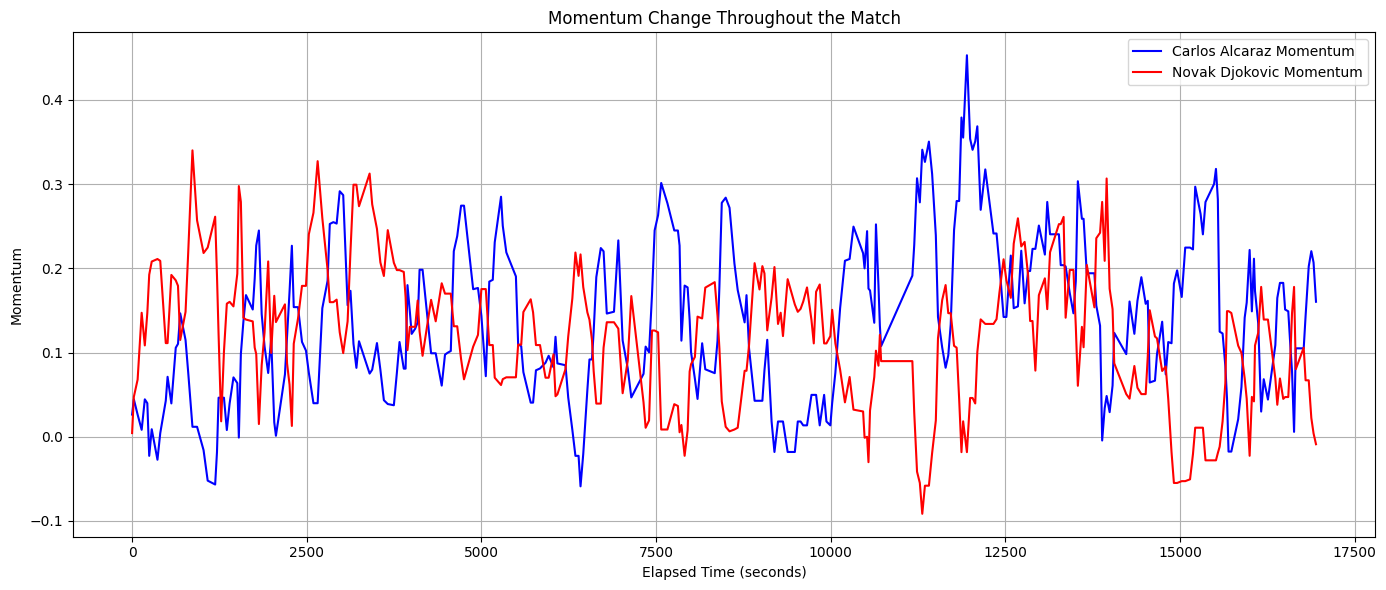

In [41]:
import matplotlib.pyplot as plt
import numpy as np

#将elapsed_time转换为秒
seconds = match_data['elapsed_time'].apply(lambda x: sum(int(a) * 60**index for index, a in enumerate(reversed(x.split(":")))))

#绘制势头变化图
plt.figure(figsize=(14, 6))

#Player1的势头变化
plt.plot(seconds, match_data['p1_momentum'], label=match_data['player1'].iloc[0] + " Momentum", color='blue')
#Player2的势头变化
plt.plot(seconds, match_data['p2_momentum'], label=match_data['player2'].iloc[0] + " Momentum", color='red')

#标题和坐标轴
plt.legend()
plt.title('Momentum Change Throughout the Match')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Momentum')
plt.grid(True)
plt.tight_layout()

# 显示图表
plt.show()

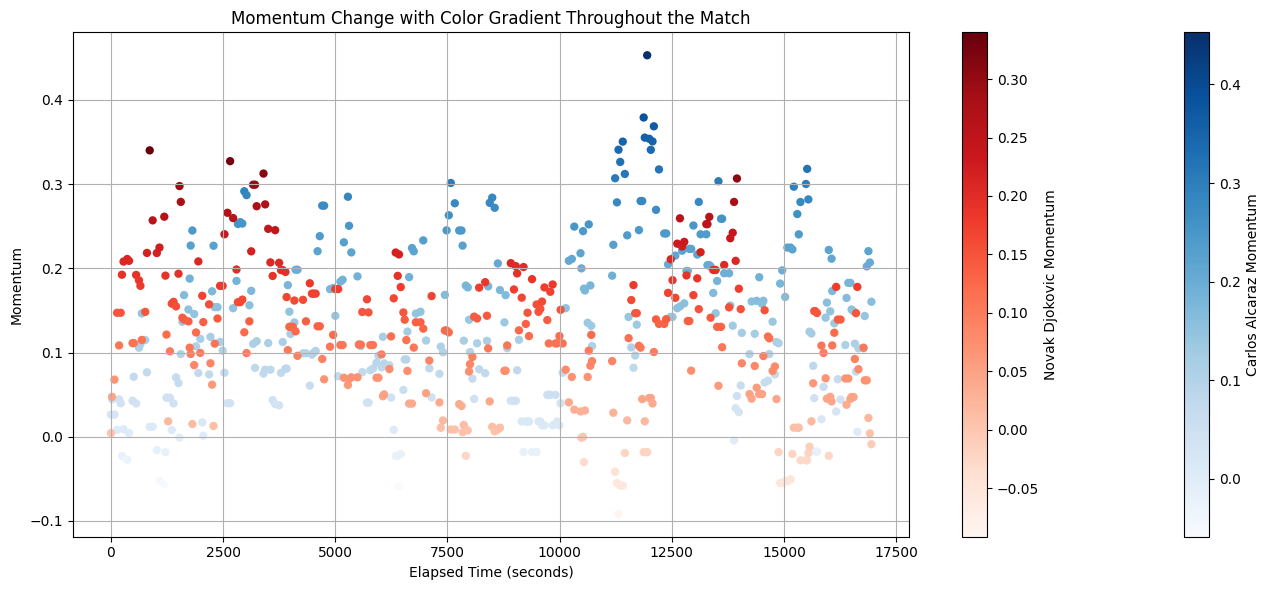

In [43]:
#球员在不同时间点的势头优势程度，可以用颜色的深浅代表
#颜色越深 势头越大 反之亦然

# 创建颜色映射
# 势头的范围
momentum_range = np.linspace(min(min(match_data['p1_momentum']), min(match_data['p2_momentum'])),
                             max(max(match_data['p1_momentum']), max(match_data['p2_momentum'])), num=100)
# 创建一个颜色映射对象
cmap = plt.get_cmap('coolwarm')

plt.figure(figsize=(14, 6))

# Player1的势头变化
sc1 = plt.scatter(seconds, match_data['p1_momentum'], c=match_data['p1_momentum'], cmap='Blues', label=match_data['player1'].iloc[0] + " Momentum", edgecolor='none')
# Player2的势头变化
sc2 = plt.scatter(seconds, match_data['p2_momentum'], c=match_data['p2_momentum'], cmap='Reds', label=match_data['player2'].iloc[0] + " Momentum", edgecolor='none')

#颜色条
cbar1 = plt.colorbar(sc1, orientation='vertical')
cbar2 = plt.colorbar(sc2, orientation='vertical')
cbar1.set_label(match_data['player1'].iloc[0] + ' Momentum')
cbar2.set_label(match_data['player2'].iloc[0] + ' Momentum')

#标题和坐标轴
plt.title('Momentum Change with Color Gradient Throughout the Match')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Momentum')

plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
#以上，完成散点图，将球员势头在何时呈现优势或劣势可视化展示出来